In [1]:
from scipy.linalg import solve
from scipy.special import erf
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
# import sklearn
import scipy.io
%matplotlib inline

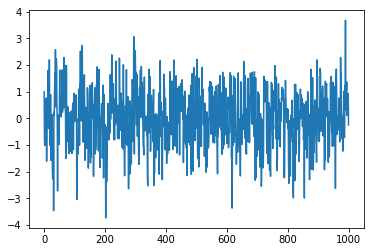

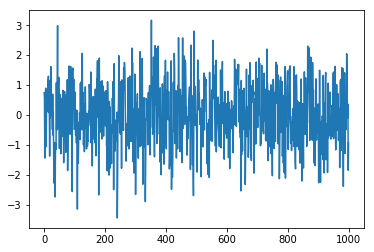

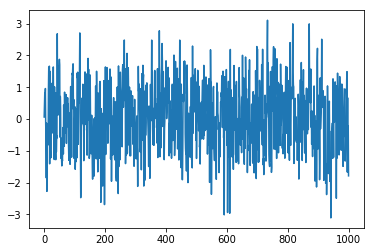

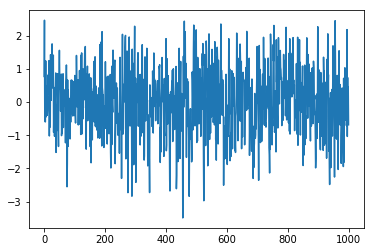

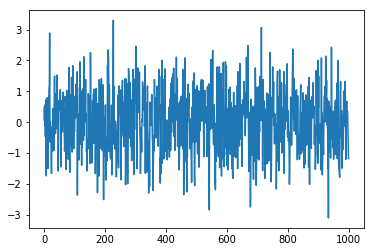

In [2]:
#generate simulated data
num_of_var = 5
time_points = 1000

m = np.random.rand(num_of_var, num_of_var)-0.5
m = 0.5*m.dot(m.T) - np.eye(num_of_var)
x_simulated = np.zeros((num_of_var, time_points))
x_simulated[:,0] = np.random.rand(1, num_of_var)
std = 1
for i in range(1, time_points):
    x_simulated[:, i] = x_simulated[:,i-1] + std**2*x_simulated[:,i-1].dot(m) + std*np.random.normal(size=num_of_var) 
    
train_frac = 0.8
n_seconds = x_simulated.shape[1] #-1 to account for when t=n
t = np.arange(n_seconds)
split = int(n_seconds * train_frac)
t_train, t_test = t[:split], t[split:]
l = float(len(t_train)-1)
t_train1, t_train2 = t_train[:-1], t_train[1:]
t_test1, t_test2 = t_test[:-1], t_test[1:]

for i in range((x_simulated.shape[0])):
    plt.plot(x_simulated[i])
    plt.show()

In [88]:
def fit(i, x, iters=50, atol=1e-16):
    y = x[i,1:]-x[i,:-1]

    x_train = x[:, t_train]
    x_train1, x_test1 = x[:,t_train1], x[:,t_test1]

    s = np.sign((y[t_train1]))
    c = np.cov(x_train)

#     x0 = (x_train1 - x_train.mean(1)[:, np.newaxis]) / l
    x0 = x_train1/l

#     w = np.zeros(x.shape[0]) #272 channels
#     w[0] = 1
    w = np.random.rand(x.shape[0])-0.5

    erf_last = np.inf
    e = []
#     d = []

    for it in range(iters):
        h = w.dot(x_train1)
        
        sig = 1#np.std(y[t_train1] - w.dot(x[:, t_train1]))
#         print(sig)
        erf_next = erf(h/(np.sqrt(2)))

#         d.append(np.linalg.norm(y[t_train2]-h/np.sqrt(2))**2)
        ei = np.linalg.norm(erf_next - erf_last) 
        e.append(ei)
        if ei * ei < atol:
            print(it)
            break
        erf_last = erf_next.copy()
    
        h *= s / erf_next
#         w = np.linalg.pinv(c).dot(x0.dot(h))
        w = solve(c+1e-6*np.eye(x.shape[0]), x0.dot(h))
    return w, e

In [4]:
res_simulated = [fit(i,x_simulated) for i in range(x_simulated.shape[0])]
w_simulated = np.vstack([r[0] for r in res_simulated])
e_simulated = [r[1] for r in res_simulated]

24
24
21
26
24


In [93]:
c = np.linalg.inv(np.cov(x_real)1e-6*np.eye(x.shape[0]))
c

array([[ 3.78570275e+14,  2.04204132e+14, -8.99027691e+14, ...,
        -2.34526180e+14, -1.58655159e+14, -5.75524509e+14],
       [ 8.49693244e+13, -1.73060995e+13, -2.05062047e+14, ...,
         7.80144591e+13, -2.16848799e+14,  1.77406355e+14],
       [-9.20808536e+14, -4.98094973e+14,  2.18879240e+15, ...,
         5.71386669e+14,  4.20027148e+14,  1.44887448e+15],
       ...,
       [ 2.65537180e+13,  1.43251805e+14, -5.83294669e+13, ...,
        -2.81435207e+14,  3.23846730e+14, -7.05230299e+14],
       [-7.79995460e+14, -5.68426646e+14,  1.88281732e+15, ...,
         7.53715468e+14,  5.85818524e+14,  2.65819226e+15],
       [-3.05232950e+14,  1.79041903e+14,  7.84901398e+14, ...,
        -5.60926002e+14,  1.86972877e+15, -3.69447159e+14]])

In [89]:
# 147 trials (for every MEG sensor), 241 sensors, and 1018 different time stamps for 1018 entries of MEG data (for each sensor)
data = scipy.io.loadmat('100307_MEG_3-Restin_rmegpreproc.mat')
# data = scipy.io.loadmat('102816_MEG_4-Restin_rmegpreproc')
x_real = data['data'][0][0][4][0][1]*10**12

train_frac = 0.8
n_seconds = x_real.shape[1] #-1 to account for when t=n
t = np.arange(n_seconds)
split = int(n_seconds * train_frac)
t_train, t_test = t[:split], t[split:]
l = float(len(t_train)-1)
t_train1, t_train2 = t_train[:-1], t_train[1:]
t_test1, t_test2 = t_test[:-1], t_test[1:]

res_real = [fit(i,x_real) for i in range(x_real.shape[0])]
w_real = np.vstack([r[0] for r in res_real])
e_real = [r[1] for r in res_real]

34
33
26
35
30
30
43
32
32
32
32
47
38
22
38
32
42
30
33
29
31
33
26
29
43
23
31
24
37
20
47
28
25
29
29
35
47
35
43
25
38
35
34
32
22
38
40
33
21
32
35
37
39
30
35
31
30
40
30
34
29
38
21
34
28
32
30
48
33
37
36
32
30
27
44
29
33
36
37
38
44
32
49
30
44
36
37
40
31
28
30
34
33
31
29
25
32
38
38
18
32
40
36
26
27
28
36
37
35
41
29
38
37
35
37
34
38
32
46
49
27
31
34
42
30
35
35
26
41
30
26
27
46
41
30
25
31
25
36
30
42
35
26
28
34
38
38
35
29
32
36
28
26
37
29
39
38
30
43
25
34
25
36
24
29
43
39
40
35
36
46
41
39
30
32
37
34
37
37
29
44
25
33
22
37
32
37
33
27
43
47
44
32
25
33
35
24
37
40
32
26
40
23
32
32
34
39
35
33
38
28
26
35
33
33
35
30
36
27
26
26
39
31
27
22
35
24
32
30
23
27
38
32
35
33
29


In [90]:
# c_simulated = x.copy()
# for i in range(1, time_points):
#     c_simulated[:, i] = simulated_x[:,i-1] + std**2*simulated_x[:,i-1].dot(w) + std*np.random.normal(size=num_of_var)

res = np.zeros((1,y_combined.shape[0]))
for i in range(y_combined.shape[0]):
    y_real = x_real[i,1:]-x_real[i,:-1]
    sig = (.1/6000.)
#     res.append(np.std(y_real[i]/sig - w_real[i].dot(x_real)))
    print(np.std(y_real/sig - w_real[i].dot(x_real[:,:-1])))

10564.763058292936
9347.158409077161
36120.69900394683
8229.295657259725
14252.219715998635
9370.242678628563
28697.660692604455
10053.87989270519
17560.630646024594
19038.366992967207
13346.915252682753
58573.503258030985
21147.5818941155
10018.286685332025
24261.275742990238
9420.932778591585
14784.097272660421
17622.74959607055
13404.29940062724
19125.33867262113
15291.863110367678
15987.720925291498
18699.289172278324
11526.421234378393
11858.458611401033
14882.502677343535
43840.94361445405
18938.965178649974
33225.03928670978
16342.568401943598
12605.759572844212
17689.393747193655
10739.168022321383
13661.009617530586
7887.815448839643
10067.582925941922
11323.445156430213
21299.0863822816
7793.722836434041
11744.604135479352
12472.591064252854
26035.099733000436
59873.22488780025
23369.221454399372
8789.872375244231
16338.181067980453
11986.893499233462
22957.84839423393
7325.259545566861
9497.12283564426
32962.249007946986
51581.27230726942
21188.774419975045
9048.758135777502

In [84]:
w_real[i].dot(x_real[:,:-1])

array([ -6782.53532527, -17129.7361645 , -13112.87613259, ...,
        51504.723174  ,  48592.0148566 ,  48275.89324074])

In [56]:
x_simulated

array([[ 0.99213067, -0.78023826, -1.0270494 , ...,  0.6651752 ,
         0.91988359, -0.25175149],
       [ 0.75004342,  0.58197116, -1.43103886, ...,  0.36865282,
        -1.83656889, -0.92525671],
       [ 0.06394159,  0.42733335,  0.82587961, ..., -1.52158008,
        -0.21746987, -1.78609824],
       [ 0.77419174,  2.47011275, -0.41054658, ..., -0.04849197,
         0.44742522, -0.68143481],
       [ 0.07480213,  0.49538674, -0.10620592, ..., -0.30234747,
        -0.73942384, -1.17419844]])

In [57]:
x_real

array([[-1.52686791e-13, -1.86283818e-13, -5.22388395e-14, ...,
         1.73116379e-13,  5.28349653e-14, -2.66101958e-14],
       [-4.80668357e-14, -6.57403815e-14,  2.59822556e-15, ...,
        -1.87739829e-13, -1.74566678e-13, -2.03919156e-14],
       [ 1.63010506e-13, -1.27448203e-13, -1.93463951e-13, ...,
        -4.61162759e-13, -2.47595757e-13, -2.06196609e-13],
       ...,
       [-1.23604133e-13,  4.00690943e-14, -8.33126069e-15, ...,
         8.56137182e-14,  7.56496499e-14,  2.55197110e-14],
       [ 3.95661616e-14,  3.16861056e-15, -1.57062952e-13, ...,
        -3.09999971e-13, -4.10157613e-13, -2.28157560e-13],
       [ 9.84555959e-14,  3.10724834e-13, -7.39365639e-15, ...,
        -1.93825558e-13, -8.46633690e-14,  1.49935548e-13]])

In [8]:
plt.plot(x, simulated_x,'ko')

import plotly
from scipy import stats
x_values = [];
y_values = [];
for i in range(simulated_x.shape[0]):
    for j in simulated_x[i]:
        x_values.append(j)
    for k in x[i]:
        y_values.append(k)
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
print(r_value)

NameError: name 'x' is not defined